In [97]:
#Imports
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import seaborn as sns

warnings.filterwarnings('ignore')




In [98]:
df = pd.read_csv("../data/kickstarter_projects.csv")
df.head()


# Convert all column names to lower case
df.columns = df.columns.str.lower()

# Count the number of unique values for each column
unique_counts = df.nunique()

df.columns.value_counts
df.nunique()

id             374853
name           372061
category           15
subcategory       159
country            22
launched       374297
deadline         3164
goal            27692
pledged         39989
backers          3963
state               5
dtype: int64

In [99]:
df.head()

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


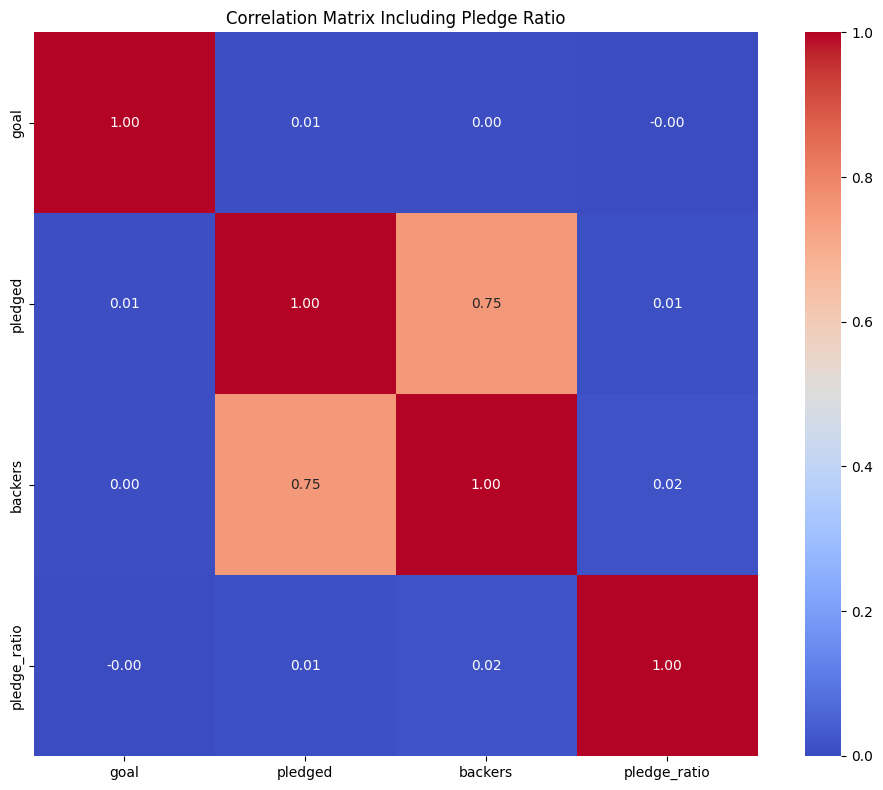

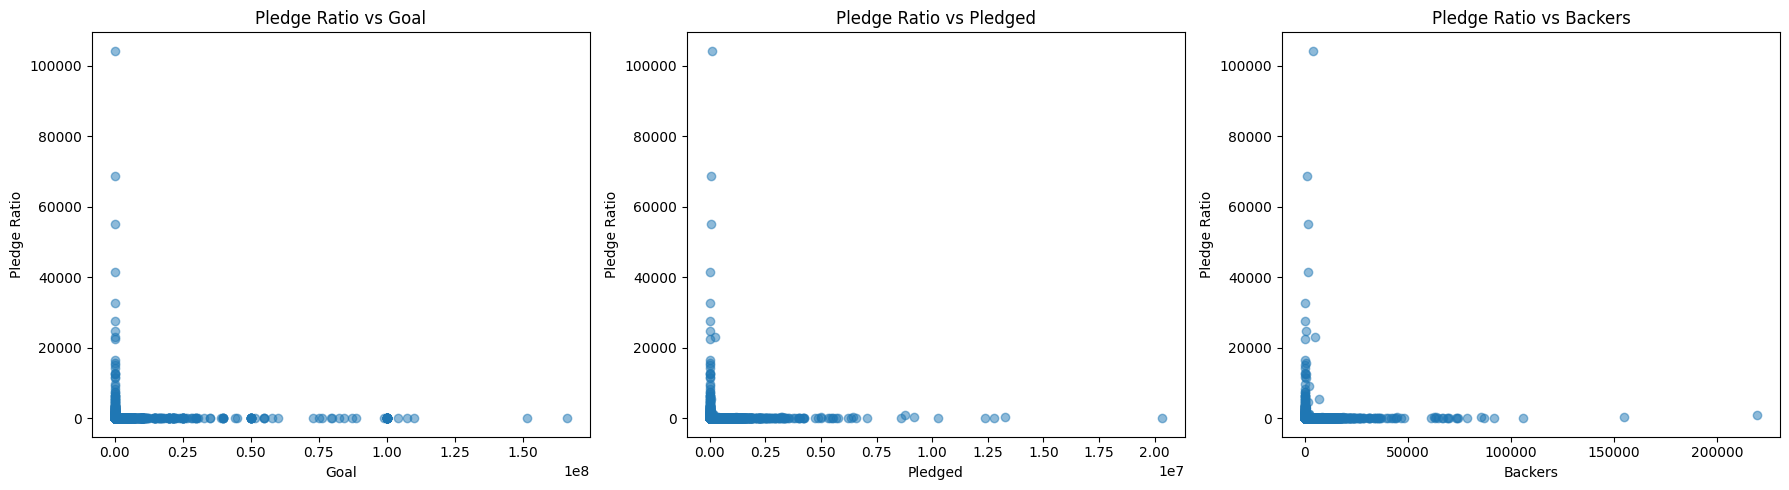

In [100]:
df_cleaned = df

# Recalculate pledge_ratio to be sure it's based on clean data
df_cleaned['pledge_ratio'] = df_cleaned['pledged'] / df_cleaned['goal']

# Recompute correlation matrix including the newly added pledge_ratio
correlation_matrix_updated = df_cleaned[['goal', 'pledged', 'backers', 'pledge_ratio']].corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Including Pledge Ratio")
plt.tight_layout()
plt.show()

# Scatter plot to visualize pledge_ratio correlation with other features
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(df_cleaned['goal'], df_cleaned['pledge_ratio'], alpha=0.5)
axs[0].set_xlabel('Goal')
axs[0].set_ylabel('Pledge Ratio')
axs[0].set_title('Pledge Ratio vs Goal')

axs[1].scatter(df_cleaned['pledged'], df_cleaned['pledge_ratio'], alpha=0.5)
axs[1].set_xlabel('Pledged')
axs[1].set_ylabel('Pledge Ratio')
axs[1].set_title('Pledge Ratio vs Pledged')

axs[2].scatter(df_cleaned['backers'], df_cleaned['pledge_ratio'], alpha=0.5)
axs[2].set_xlabel('Backers')
axs[2].set_ylabel('Pledge Ratio')
axs[2].set_title('Pledge Ratio vs Backers')

plt.tight_layout()
plt.show()

In [104]:
df_cleaned.head()

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684


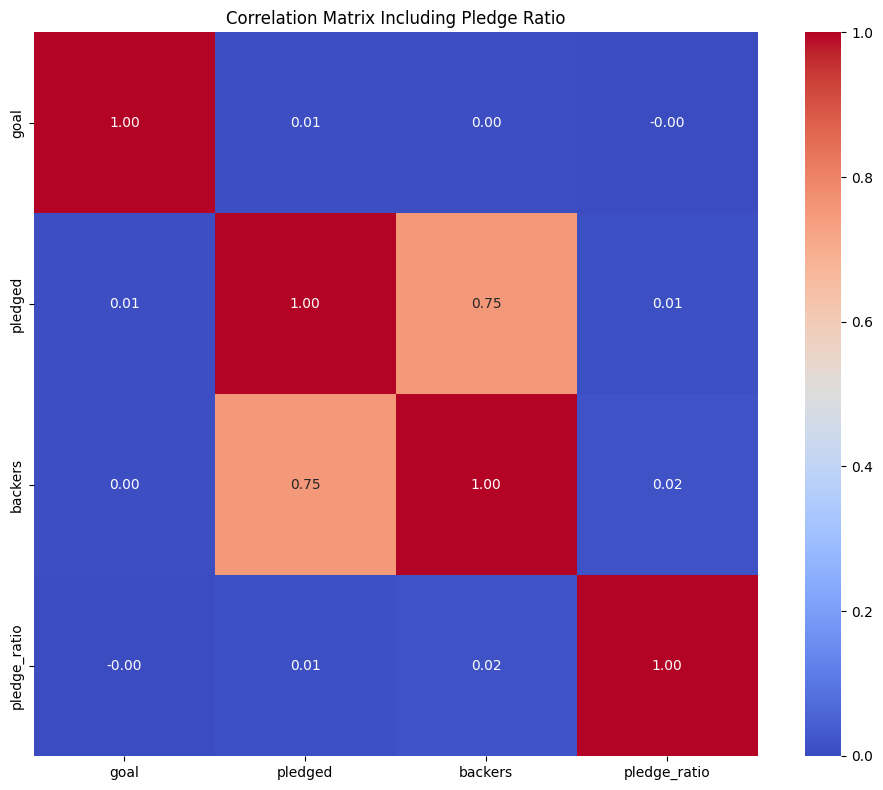

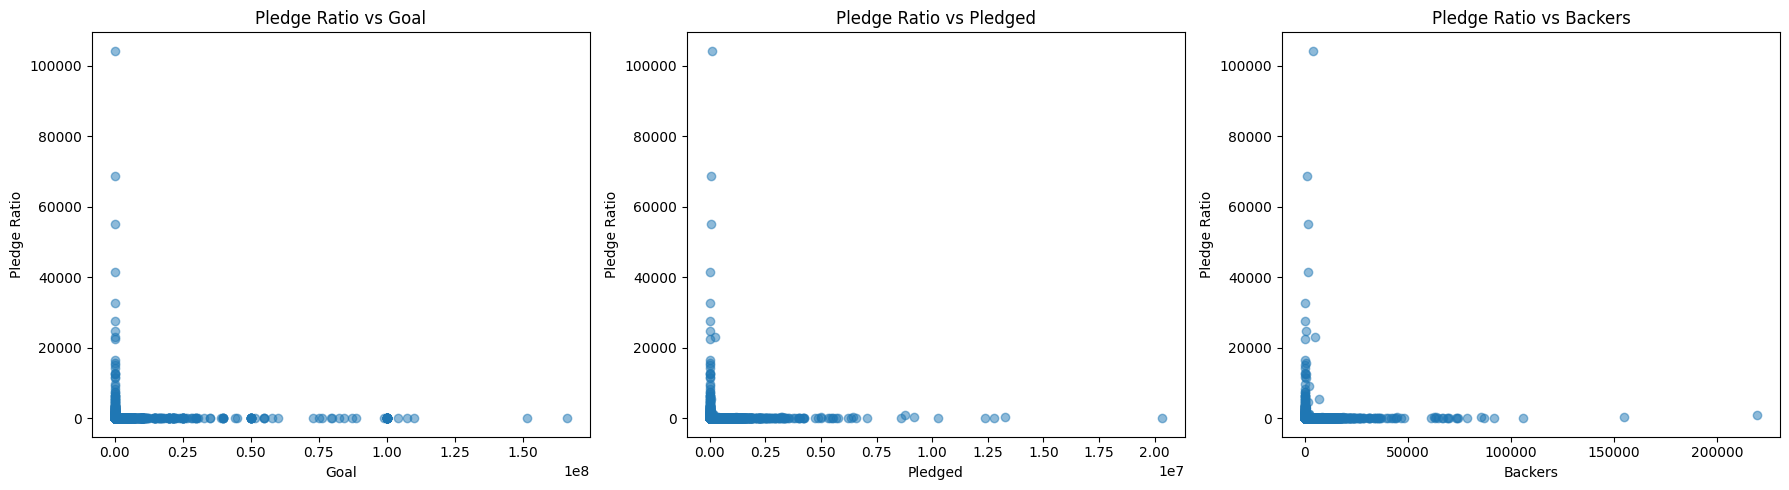

In [103]:

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Convert columns to appropriate types
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')
df['goal'] = pd.to_numeric(df['goal'], errors='coerce')
df['pledged'] = pd.to_numeric(df['pledged'], errors='coerce')
df['backers'] = pd.to_numeric(df['backers'], errors='coerce')

# Filter out rows with invalid or zero goals to avoid division errors
df = df[df['goal'] != 0]

# Calculate pledge_ratio
df['pledge_ratio'] = df['pledged'] / df['goal']

# Replace infinite values and drop rows with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['goal', 'pledged', 'backers', 'pledge_ratio'], inplace=True)

# Recompute correlation matrix
correlation_matrix_updated = df[['goal', 'pledged', 'backers', 'pledge_ratio']].corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Including Pledge Ratio")
plt.tight_layout()
plt.show()

# Scatter plots for visual correlation with pledge_ratio
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(df['goal'], df['pledge_ratio'], alpha=0.5)
axs[0].set_xlabel('Goal')
axs[0].set_ylabel('Pledge Ratio')
axs[0].set_title('Pledge Ratio vs Goal')

axs[1].scatter(df['pledged'], df['pledge_ratio'], alpha=0.5)
axs[1].set_xlabel('Pledged')
axs[1].set_ylabel('Pledge Ratio')
axs[1].set_title('Pledge Ratio vs Pledged')

axs[2].scatter(df['backers'], df['pledge_ratio'], alpha=0.5)
axs[2].set_xlabel('Backers')
axs[2].set_ylabel('Pledge Ratio')
axs[2].set_title('Pledge Ratio vs Backers')

plt.tight_layout()
plt.show()

In [105]:
df.head()

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,0.625000
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,0.000275
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,0.203684


In [108]:
df[df.state!="Failed"]

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,pledge_ratio
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,1.750000
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,1.464646
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,1.109667
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,1.126000
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live,0.000000
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live,0.017933
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live,0.016500
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live,0.010769
